<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#5: Raíces de los primeros 5 polinomios de Laguerre


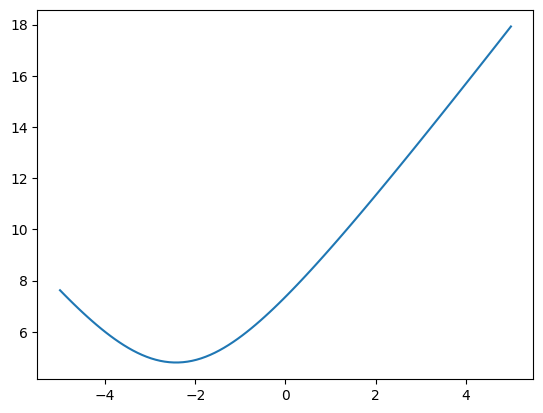

In [8]:
#7: Minimización del camino óptico
def camino_optico(x):
  return 1*(np.sqrt(((x-(-3))**2)+2**2))+1.33*(np.sqrt(((x-(-2))**2)+2**2))
x=np.linspace(-5,5,100)
y=camino_optico(x)
plt.plot(x,y)
plt.show()

In [ ]:
#7: Aproximación de la función sin(x)
x=np.array([0,np.pi/3,np.pi/2])
y=np.array([np.sin(0),np.sin(np.pi/3),np.sin(np.pi/2)])

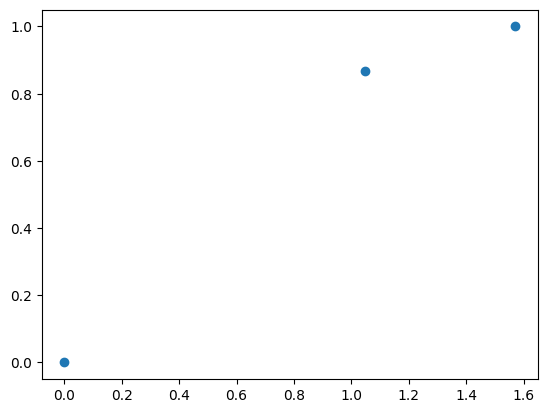

In [ ]:
 Ω=plt.scatter(x,y)

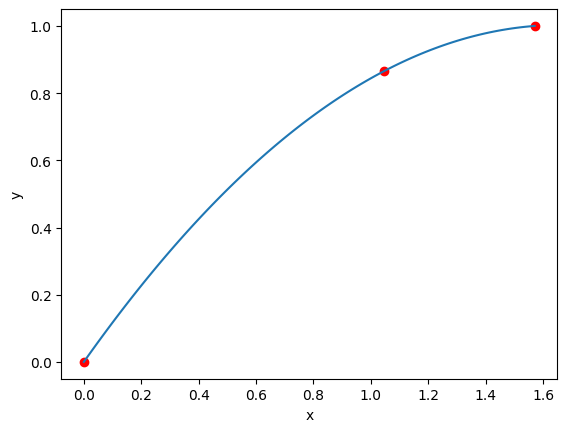

In [ ]:

def lagrange(x, y, x_val):
    n = len(x)
    resultado = 0
    for i in range(n):
        termino = y[i]
        for j in range(n):
            if i != j:
                termino *= (x_val - x[j]) / (x[i] - x[j])
        resultado += termino
    return resultado
x_ = np.linspace(0, np.pi/2, 100)
y_ = [lagrange(x, y, xi) for xi in x_]
plt.plot(x_, y_)
plt.scatter(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
x_valor=np.pi/8
y_valor=lagrange(x,y,x_valor)
print(x_valor)
print(y_valor)


0.39269908169872414
0.4182089344431201


In [ ]:
valor_real=np.sin(x_valor)
error=np.abs(valor_real-y_valor)
print(error)

0.03552550207803029


In [ ]:
n=len(x)-1
def factorial(n):
    if n == 0:
        return 1
    else:
        respuesta = 1
        for i in range(1, n + 1):
            respuesta *= i
        return respuesta
E=(1 / factorial(n+1)) * np.prod([abs(y_valor - xi) for xi in x])
print(E)
print(error)
#no son iguales pero son del mismo orden, entonces los resultados son consistentes.

0.050531094692775655
0.03552550207803029
